# Week 3 DataFrames

### Pandas for Statistics

### Binomial Distribution

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1,0.5)

0

In [3]:
np.random.binomial(1,0.7)

1

In [7]:
np.random.binomial(100,0.5)

47

In [8]:
np.random.binomial(100,0.5)/100

0.42

In [9]:
# Chance of Tornado

chance_of_tornado=0.01/100

np.random.binomial(100000,chance_of_tornado)

7

In [14]:
chance_of_tornado=0.01

tornado_events=np.random.binomial(1,chance_of_tornado,100000)

two_days_in_a_row=0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornado back to back in {} years'.format(two_days_in_a_row, 100000/365))

8 tornado back to back in 273.972602739726 years


### Uniform Distribution

In [15]:
np.random.uniform(0, 1)

0.7440857048063289

### Normal Distribution

In [12]:
np.random.normal(0.75)

-0.7445060450901104

### Standard Deviation

In [16]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))


1.0288185605914624

In [17]:
np.std(distribution)

1.0288185605914624

### Kurtosis

In [18]:
import scipy.stats as stats

stats.kurtosis(distribution)

-0.1005665335434962

In [19]:
stats.skew(distribution)

0.02130316694554183

### Chi Square

In [20]:
chi_squared_df2 = np.random.chisquare(2, size=10000)

stats.skew(chi_squared_df2)

1.9588293054817665

In [21]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2847056133042822

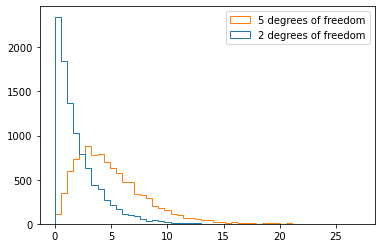

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

### Hypothesis Testing

In [27]:
df = pd.read_csv('grades.csv')
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,55:34.3,83.030552,22:58.9,67.164441,58:34.0,53.011553,21:24.7,47.710398,24:59.7,38.168318,31:15.9
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,57:44.4,86.290821,41:18.4,69.772657,54:55.9,55.098125,32:30.9,49.588313,26:39.3,44.629482,07:24.3
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,36:02.4,85.512541,39:44.4,68.410033,22:45.9,54.728026,41:50.7,49.255224,31:12.5,44.329701,24:42.8
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,50:39.8,68.824532,20:38.7,61.942079,47:16.3,49.553663,09:20.5,49.553663,51:18.0,44.598297,09:12.1
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,06:10.8,51.491040,25:12.1,41.932832,25:22.6,36.929549,29:55.9,33.236594,46:06.6,33.236594,06:59.5


In [28]:
len(df)

2315

In [29]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [30]:
early.mean()

assignment1_grade    74.409388
assignment2_grade    66.571152
assignment3_grade    60.661158
assignment4_grade    54.017086
assignment5_grade    48.464067
assignment6_grade    43.691570
dtype: float64

In [31]:
late.mean()

assignment1_grade    74.602704
assignment2_grade    66.996290
assignment3_grade    60.603075
assignment4_grade    54.162483
assignment5_grade    48.700394
assignment6_grade    43.920900
dtype: float64

In [35]:
from scipy import stats
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')>

In [36]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=-0.270587455293599, pvalue=0.7867324873933794)

In [37]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=-0.6098051843387805, pvalue=0.5420507665743797)

In [38]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=0.08581616588221054, pvalue=0.931619982780735)

In [40]:
import numpy as np

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]

In [41]:
import numpy as np

a = np.arange(8)
a


array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
b = a[4:6]
b

array([4, 5])

In [43]:
b[:] = 40
b

array([40, 40])

In [44]:
c=a[4]+a[6]
c

46

In [47]:
import re
s = 'ABCAC'

In [48]:
len(re.split('A', s)) == 2

False

In [49]:
bool(re.match('A', s)) == True

True

In [50]:
len(re.search('A', s)) == 2

TypeError: object of type 're.Match' has no len()

In [51]:
re.match('A', s) == True

False